In [1]:
import numpy as np 
import pandas as pd
import json
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
import os

In [ ]:
pd.

In [2]:
#Getting config file for all category 
config_map_df = pd.read_csv('mapping_config.csv')

#Reading dm_catalog into data frame 
category_df = pd.read_csv('dm_catalog.csv')

In [25]:
for comp in os.listdir('../org_data'):
    print(comp)

us.nttdata.com.csv
deloitte.com.csv
techmahindra.com.csv
indracompany.com.csv
hpe.com.csv
ubs.com.csv
accenture.com.csv
sony.com.csv
altran.com.csv
bitdefender.com.csv
unilever.com.csv
capgemini.com.csv
wipro.com.csv
cisco.com.csv
soprasteria.com.csv


In [3]:
# reading tg_org with high intensity 
prod_intenisty_df = pd.read_csv('../org_data/pwc.com.csv')



In [4]:
#Merging category with with products
prod_with_category_df = prod_intenisty_df.merge(right=category_df, left_on="product_id", right_on="DM_ID")



In [5]:
# Fetching the parent category mapping deatils 
def get_parent_category_map(prod_with_category_df):
    """This function returns parent category map"""

    cat_list = ['STORAGE',
     'SERVERS',
     'HOSTING SERVICES',
     'CONTENT MANAGEMENT SYSTEMS',
     'IT INFRASTRUCTURE',
     'ARTIFICIAL INTELLIGENCE',
     'DEVELOPMENT',
     'ANALYTICS']

    try:
        cat_df = pd.DataFrame(cat_list,columns=['parent_cat'])
        merged_df = cat_df.merge( right=prod_with_category_df,how="left" ,left_on="parent_cat", right_on="PARENT_CATEGORY")

        parent_category_df = merged_df.groupby(by="parent_cat")['product_id'].count().apply(lambda category: 1 if category else 0).to_dict()
        parent_category_map = [(k, v) for k, v in parent_category_df.items()]

        return parent_category_map

    except Exception as ex:
        print(ex)


In [6]:
# Fetching the sub category mapping details
def get_sub_category_map(prod_with_category_df):
    """This function returns sub categories mapping"""

    sub_list= ['APPLICATION RELEASE ORCHESTRATION SOFTWARE',
     'TRANSACTIONAL EMAIL SOFTWARE',
     'EMAIL SOFTWARE',
     'AI PLATFORMS SOFTWARE',
     'EMAIL VERIFICATION SOFTWARE',
     'APPLICATION DEVELOPMENT SOFTWARE',
     'MACHINE LEARNING SOFTWARE',
     'DATA WAREHOUSE SOFTWARE',
     'SERVER VIRTUALIZATION SOFTWARE',
     'DATABASE SOFTWARE',
     'ENTERPRISE SEARCH SOFTWARE',
     'CONTAINERIZATION SOFTWARE',
     'STORAGE MANAGEMENT SOFTWARE',
     'LOAD BALANCING SOFTWARE',
     'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE',
     'CONTINUOUS DELIVERY SOFTWARE',
     'WEB ACCELERATOR SOFTWARE',
     'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE',
     'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS']

    try:
        sub_cat_df = pd.DataFrame(sub_list,columns=['sub_cat'])
        merged_df = sub_cat_df.merge( right=prod_with_category_df,how="left" ,left_on="sub_cat", right_on="SUB_CATEGORY")

        sub_category_df = merged_df.groupby(by="sub_cat")['product_id'].count().apply(lambda category: 1 if category else 0).to_dict()
        sub_category_map = [(k, v) for k, v in sub_category_df.items()]

        return sub_category_map

    except Exception as ex:
        raise Exception(f"Error while mapping sub categories")

In [7]:
#Fetching the cloud product
def get_product_map(prod_with_category_df):
    """This function checks organization empsize exclusion size"""
    prod_list = ['APACHE 2.2',
     'NGINX',
     'GOOGLE CLOUD PLATFORM',
     'AMAZON S3',
     'MICROSOFT AZURE BLOB STORAGE',
     'AMAZON AWS',
     'MICROSOFT AZURE',
     'APACHE 1.3',
     'APACHE 2.0',
     'APACHE 2.4']

    try:
        prod_list_df = pd.DataFrame(prod_list,columns=['products'])
        merged_df = prod_list_df.merge( right=prod_with_category_df,how="left" ,left_on="products", right_on="product")

        prod_category_df = merged_df.groupby(by="products")['product_id'].count().apply(lambda category: 1 if category else 0).to_dict()
        prod_category_map = [(k, v) for k, v in prod_category_df.items()]

        return prod_category_map

    except Exception as ex:
        raise Exception(f"Error while mapping prod_category")


In [8]:
# getting emp size mapping 
def get_empsize_map(org_empsize_range):
    """This function checks organization empsize exclusion size"""
    emp_size = org_empsize_range
    empsz_list_map = []
    empsize_list = ['10-to-50','50-to-200', '200-to-500']

    try:     
        #mapping of empsz_list_map when emp range is  '10-to-50'
        if emp_size == '10-to-50':

            vector_val = [1,0,0]
            empsz_list_map = list(zip(empsize_list,vector_val))
            return empsz_list_map                

        #mapping of empsz_list_map when emp range is  '50-to-200'
        if emp_size == '50-to-200':

            vector_val = [1,1,0]
            empsz_list_map = list(zip(empsize_list,vector_val))
            return empsz_list_map

        #mapping of empsz_list_map when emp range is  '200-to-500'
        if emp_size == '200-to-500':

            vector_val = [1,1,1]
            empsz_list_map = list(zip(empsize_list,vector_val))
            return empsz_list_map

        #mapping of empsz_list_map when emp range does not fall in any range
        if not empsz_list_map:

            vector_val = [0,0,0]
            empsz_list_map = list(zip(empsize_list,vector_val))
            return empsz_list_map

    except Exception as ex:
        raise Exception(f"Error while mapping empsize mapping")

In [9]:

org_empsize_range = '0-to-0'
#Getting parent category vector values distribution
cat_list_map = get_parent_category_map(prod_with_category_df)

#Getting sub category vector values distribution
sub_list_map = get_sub_category_map(prod_with_category_df)

#Getting product category vector values distribution
prod_list_map = get_product_map(prod_with_category_df)

#getting emp size range
empsz_list_map = get_empsize_map(org_empsize_range)

#Convert all the vector value distribution of org in same format as in config file vector distribution 
try:
    total_map = cat_list_map +sub_list_map+prod_list_map+empsz_list_map
    total_map.sort()
    total_map_dict = dict(total_map)

    org = list(total_map_dict.values())
    org_np = np.array(org)
    print(np.array(org))

except Exception as ex:
    raise Exception(f"Error while calculating vector value of org ")




[0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [12]:
# Findng the cosine similarity for all the category for  the org
spend_cluster = ['10k-25k',
 '25k-50k',
 '50k-100k',
 '100k-150k',
 '200k-250k',
 '250k-500k',
 '500k+']

try:
    cos_dist_dict = {}

    for clust in spend_cluster:
        clust_var_data = config_map_df[config_map_df['spend']==clust][list(total_map_dict.keys())].values 
        cos_dist_dict[clust] = distance.cosine(clust_var_data,org_np)
    print('cosine')
    print(cos_dist_dict)
    print()

except Exception as ex:
    print(ex)
    raise Exception(f"Error while calculating cloud_spending by cosine")

#ecludian distance

try:
    eclud_dist_dict = {}

    for clust in spend_cluster:
        clust_var_data = config_map_df[config_map_df['spend']==clust][list(total_map_dict.keys())].values 
        eclud_dist_dict[clust] = distance.euclidean(clust_var_data,org_np)
    print('euclidean')
    print(eclud_dist_dict)
    print()

except Exception as ex:
    print(ex)
    raise Exception(f"Error while calculating cloud_spending")


#Hamming  distance

try:
    hamming_dist_dict = {}

    for clust in spend_cluster:
        clust_var_data = config_map_df[config_map_df['spend']==clust][list(total_map_dict.keys())].values 
        hamming_dist_dict[clust] = distance.hamming(clust_var_data,org_np)
    print('Hamming')
    print(hamming_dist_dict)
    print()

except Exception as ex:
    print(ex)
    raise Exception(f"Error while calculating cloud_spending")
    

# Jaccard Index  distance

try:
    jaccard_dist_dict = {}

    for clust in spend_cluster:
        clust_var_data = config_map_df[config_map_df['spend']==clust][list(total_map_dict.keys())].values 
        jaccard_dist_dict[clust] = distance.jaccard(clust_var_data,org_np)

  
    print('Jaccard')
    print(jaccard_dist_dict)
    print()

except Exception as ex:
    print(ex)
    raise Exception(f"Error while calculating cloud_spending")
    
# kulsinski Index  distance

try:
    kulsinski_dist_dict = {}

    for clust in spend_cluster:
        clust_var_data = config_map_df[config_map_df['spend']==clust][list(total_map_dict.keys())].values 
        kulsinski_dist_dict[clust] = distance.kulsinski(clust_var_data,org_np)
  
    print('kulsinski')
    print(kulsinski_dist_dict)
    print()

except Exception as ex:
    print(ex)
    raise Exception(f"Error while calculating cloud_spending")

cosine
{'10k-25k': 0.5735985672887791, '25k-50k': 0.4522774424948339, '50k-100k': 0.27831216351296784, '100k-150k': 0.08665374096737621, '200k-250k': 0.07001889004944584, '250k-500k': 0.09417837268432339, '500k+': 0.10557280900008403}

euclidean
{'10k-25k': 5.196152422706632, '25k-50k': 4.795831523312719, '50k-100k': 4.0, '100k-150k': 2.449489742783178, '200k-250k': 2.23606797749979, '250k-500k': 2.6457513110645907, '500k+': 2.8284271247461903}

Hamming
{'10k-25k': 0.675, '25k-50k': 0.575, '50k-100k': 0.4, '100k-150k': 0.15, '200k-250k': 0.125, '250k-500k': 0.175, '500k+': 0.2}

Jaccard
{'10k-25k': 0.7714285714285715, '25k-50k': 0.6571428571428571, '50k-100k': 0.4444444444444444, '100k-150k': 0.16216216216216217, '200k-250k': 0.13513513513513514, '250k-500k': 0.1794871794871795, '500k+': 0.2}

kulsinski
{'10k-25k': 0.8805970149253731, '25k-50k': 0.8095238095238095, '50k-100k': 0.6428571428571429, '100k-150k': 0.32608695652173914, '200k-250k': 0.28888888888888886, '250k-500k': 0.3191489

In [ ]:
from sklearn.metrics.pairwis import 

In [103]:
import os
import json
import numpy as np 
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

#Getting config file for all category 
config_map_df = pd.read_csv('mapping_config.csv')

#Reading dm_catalog into data frame 
category_df = pd.read_csv('dm_catalog.csv')

# Fetching the parent category mapping deatils 
def get_parent_category_map(prod_with_category_df):
    """This function returns parent category map"""

    cat_list = ['STORAGE',
     'SERVERS',
     'HOSTING SERVICES',
     'CONTENT MANAGEMENT SYSTEMS',
     'IT INFRASTRUCTURE',
     'ARTIFICIAL INTELLIGENCE',
     'DEVELOPMENT',
     'ANALYTICS']

    try:
        cat_df = pd.DataFrame(cat_list,columns=['parent_cat'])
        merged_df = cat_df.merge( right=prod_with_category_df,how="left" ,left_on="parent_cat", right_on="PARENT_CATEGORY")

        parent_category_df = merged_df.groupby(by="parent_cat")['product_id'].count().apply(lambda category: 1 if category else 0).to_dict()
        parent_category_map = [(k, v) for k, v in parent_category_df.items()]

        return parent_category_map

    except Exception as ex:
        print(ex)

# Fetching the sub category mapping details
def get_sub_category_map(prod_with_category_df):
    """This function returns sub categories mapping"""

    sub_list= ['APPLICATION RELEASE ORCHESTRATION SOFTWARE',
     'TRANSACTIONAL EMAIL SOFTWARE',
     'EMAIL SOFTWARE',
     'AI PLATFORMS SOFTWARE',
     'EMAIL VERIFICATION SOFTWARE',
     'APPLICATION DEVELOPMENT SOFTWARE',
     'MACHINE LEARNING SOFTWARE',
     'DATA WAREHOUSE SOFTWARE',
     'SERVER VIRTUALIZATION SOFTWARE',
     'DATABASE SOFTWARE',
     'ENTERPRISE SEARCH SOFTWARE',
     'CONTAINERIZATION SOFTWARE',
     'STORAGE MANAGEMENT SOFTWARE',
     'LOAD BALANCING SOFTWARE',
     'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE',
     'CONTINUOUS DELIVERY SOFTWARE',
     'WEB ACCELERATOR SOFTWARE',
     'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE',
     'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS']

    try:
        sub_cat_df = pd.DataFrame(sub_list,columns=['sub_cat'])
        merged_df = sub_cat_df.merge( right=prod_with_category_df,how="left" ,left_on="sub_cat", right_on="SUB_CATEGORY")

        sub_category_df = merged_df.groupby(by="sub_cat")['product_id'].count().apply(lambda category: 1 if category else 0).to_dict()
        sub_category_map = [(k, v) for k, v in sub_category_df.items()]

        return sub_category_map

    except Exception as ex:
        raise Exception(f"Error while mapping sub categories")

#Fetching the cloud product
def get_product_map(prod_with_category_df):
    """This function checks organization empsize exclusion size"""
    prod_list = ['APACHE 2.2',
     'NGINX',
     'GOOGLE CLOUD PLATFORM',
     'AMAZON S3',
     'MICROSOFT AZURE BLOB STORAGE',
     'AMAZON AWS',
     'MICROSOFT AZURE',
     'APACHE 1.3',
     'APACHE 2.0',
     'APACHE 2.4']

    try:
        prod_list_df = pd.DataFrame(prod_list,columns=['products'])
        merged_df = prod_list_df.merge( right=prod_with_category_df,how="left" ,left_on="products", right_on="product")

        prod_category_df = merged_df.groupby(by="products")['product_id'].count().apply(lambda category: 1 if category else 0).to_dict()
        prod_category_map = [(k, v) for k, v in prod_category_df.items()]

        return prod_category_map

    except Exception as ex:
        raise Exception(f"Error while mapping prod_category")

# getting emp size mapping 
def get_empsize_map(org_empsize_range):
    """This function checks organization empsize exclusion size"""
    emp_size = org_empsize_range
    empsz_list_map = []
    empsize_list = ['10-to-50','50-to-200', '200-to-500']

    try:     
        #mapping of empsz_list_map when emp range is  '10-to-50'
        if emp_size == '10-to-50':

            vector_val = [1,0,0]
            empsz_list_map = list(zip(empsize_list,vector_val))
            return empsz_list_map                

        #mapping of empsz_list_map when emp range is  '50-to-200'
        if emp_size == '50-to-200':

            vector_val = [1,1,0]
            empsz_list_map = list(zip(empsize_list,vector_val))
            return empsz_list_map

        #mapping of empsz_list_map when emp range is  '200-to-500'
        if emp_size == '200-to-500':

            vector_val = [1,1,1]
            empsz_list_map = list(zip(empsize_list,vector_val))
            return empsz_list_map

        #mapping of empsz_list_map when emp range does not fall in any range
        if not empsz_list_map:

            vector_val = [0,0,0]
            empsz_list_map = list(zip(empsize_list,vector_val))
            return empsz_list_map

    except Exception as ex:
        raise Exception(f"Error while mapping empsize mapping")

def get_org_values(prod_intenisty_df):

    org_empsize_range = '10-to-50'

    #Merging category with with products
    prod_with_category_df = prod_intenisty_df.merge(right=category_df, left_on="product_id", right_on="DM_ID")

    #Getting parent category vector values distribution
    cat_list_map = get_parent_category_map(prod_with_category_df)

    #Getting sub category vector values distribution
    sub_list_map = get_sub_category_map(prod_with_category_df)

    #Getting product category vector values distribution
    prod_list_map = get_product_map(prod_with_category_df)

    #getting emp size range
    empsz_list_map = get_empsize_map(org_empsize_range)

    #Convert all the vector value distribution of org in same format as in config file vector distribution 
    try:
        total_map = cat_list_map +sub_list_map+prod_list_map+empsz_list_map
        total_map.sort()
        total_map_dict = dict(total_map)

        org = list(total_map_dict.values())
        org_value = np.array(org)

    except Exception as ex:
        raise Exception(f"Error while calculating vector value of org ")

    return org_value,total_map_dict


# Findng the cosine similarity for all the category for  the org
spend_cluster = ['10k-25k',
 '25k-50k',
 '50k-100k',
 '100k-150k',
 '200k-250k',
 '250k-500k',
 '500k+']

try:
    # cos_dist_dict = {}
    # eclud_dist_dict = {}
    # hamming_dist_dict = {}
    # jaccard_dist_dict = {}
    # kulsinski_dist_dict = {}


    # reading tg_org with high intensity 
    #prod_intenisty_df = pd.read_csv('../org_data/sony.com.cs')

    org_value,total_map_dict = get_org_values(prod_intenisty_df)

    output_df = []
    for clust in spend_cluster:

        print(clust)
        print()

        for org_name in os.listdir('../org_data'):
            print()
            print(org_name)
            print()
            
            file_location = '../org_data'+'/'+org_name
            prod_intenisty_df = pd.read_csv(file_location)
            org_value,total_map_dict = get_org_values(prod_intenisty_df)
            
            print(total_map_dict)
            print(org_value)

            clust_var_data = config_map_df[config_map_df['spend']==clust][list(total_map_dict.keys())].values 

            #cosine distance
            cos_dist_dict= distance.cosine(clust_var_data,org_value)

            #ecludian distance
            eclud_dist_dict = distance.euclidean(clust_var_data,org_value)

            #Hamming  distance
            hamming_dist_dict = distance.hamming(clust_var_data,org_value)

            # Jaccard Index  distance
            jaccard_dist_dict = distance.jaccard(clust_var_data,org_value)

            # kulsinski Index  distance
            kulsinski_dist_dict = distance.kulsinski(clust_var_data,org_value)
            
            #minwoski

            output = [clust ,org_name , cos_dist_dict , eclud_dist_dict , hamming_dist_dict , jaccard_dist_dict , kulsinski_dist_dict]

            
            output_df.append(output)

except Exception as ex:
    print(ex)
    raise Exception(f"Error while calculating cloud_spending")

10k-25k


us.nttdata.com.csv

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 0, 'APACHE 2.4': 0, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 0, 'EMAIL VERIFICATION SOFTWARE': 0, 'ENTERPRISE SEARCH SOFTWARE': 0, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 0, 'SERVER VIRTUALIZATION SOFTWARE': 1

unilever.com.csv

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 1, 'APACHE 2.4': 1, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 1, 'ENTERPRISE SEARCH SOFTWARE': 0, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS':

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 1, 'APACHE 2.4': 0, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 0, 'ENTERPRISE SEARCH SOFTWARE': 1, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, 'STORAGE': 1, 

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 1, 'APACHE 2.4': 1, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 1, 'ENTERPRISE SEARCH SOFTWARE': 0, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, 'STORAGE': 0, 

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 0, 'APACHE 2.4': 1, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 0, 'ENTERPRISE SEARCH SOFTWARE': 1, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 1, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, 'STORAGE': 1, 

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 0, 'APACHE 2.4': 0, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 1, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 0, 'ENTERPRISE SEARCH SOFTWARE': 1, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 1, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, 'STORAGE': 1, 

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 1, 'APACHE 2.4': 0, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 0, 'ENTERPRISE SEARCH SOFTWARE': 1, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, 'STORAGE': 1, 

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 0, 'APACHE 2.4': 1, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 0, 'ENTERPRISE SEARCH SOFTWARE': 1, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, 'STORAGE': 1, 

ubs.com.csv

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 0, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 0, 'APACHE 2.4': 1, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 0, 'ENTERPRISE SEARCH SOFTWARE': 1, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, '

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 0, 'APACHE 2.4': 1, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 0, 'ENTERPRISE SEARCH SOFTWARE': 1, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, 'STORAGE': 1, 

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 0, 'APACHE 2.4': 1, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 1, 'ENTERPRISE SEARCH SOFTWARE': 1, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, 'STORAGE': 1, 

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 0, 'APACHE 2.4': 1, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 0, 'ENTERPRISE SEARCH SOFTWARE': 1, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, 'STORAGE': 1, 

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 0, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 0, 'APACHE 2.4': 1, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 0, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 0, 'ENTERPRISE SEARCH SOFTWARE': 1, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, 'STORAGE': 1, 

{'10-to-50': 1, '200-to-500': 0, '50-to-200': 0, 'AI PLATFORMS SOFTWARE': 1, 'AMAZON AWS': 1, 'AMAZON S3': 1, 'ANALYTICS': 1, 'APACHE 1.3': 0, 'APACHE 2.0': 0, 'APACHE 2.2': 0, 'APACHE 2.4': 0, 'APPLICATION DEVELOPMENT SOFTWARE': 1, 'APPLICATION PERFORMANCE MONITORING (APM) SOFTWARE': 1, 'APPLICATION RELEASE ORCHESTRATION SOFTWARE': 1, 'ARTIFICIAL INTELLIGENCE': 1, 'CLOUD PLATFORM AS A SERVICE (PAAS) SOFTWARE': 1, 'CONTAINERIZATION SOFTWARE': 1, 'CONTENT MANAGEMENT SYSTEMS': 1, 'CONTINUOUS DELIVERY SOFTWARE': 1, 'DATA WAREHOUSE SOFTWARE': 1, 'DATABASE SOFTWARE': 1, 'DEVELOPMENT': 1, 'EMAIL SOFTWARE': 1, 'EMAIL VERIFICATION SOFTWARE': 0, 'ENTERPRISE SEARCH SOFTWARE': 1, 'GOOGLE CLOUD PLATFORM': 1, 'HOSTING SERVICES': 1, 'INFRASTRUCTURE AS A SERVICE (IAAS) PROVIDERS': 1, 'IT INFRASTRUCTURE': 1, 'LOAD BALANCING SOFTWARE': 1, 'MACHINE LEARNING SOFTWARE': 1, 'MICROSOFT AZURE': 1, 'MICROSOFT AZURE BLOB STORAGE': 0, 'NGINX': 1, 'SERVER VIRTUALIZATION SOFTWARE': 1, 'SERVERS': 1, 'STORAGE': 1, 

In [92]:
df = pd.DataFrame(output_df,columns=['spend_category','org','cosine_distance','ecludian_distance','Hamming_distance','Jaccard_distance','kulsinski_distance'])

In [93]:
def define_cluster(clust):
    if clust == '10k-25k':
        return 'cluster1'
    if clust == '25k-50k':
        return 'cluster2'
    if clust == '50k-100k':
        return 'cluster3'
    if clust == '100k-150k':
        return 'cluster4'
    if clust == '200k-250k':
        return 'cluster5'
    if clust == '250k-500k':
        return 'cluster6'
    if clust == '500k+':
        return 'cluster7'
    

In [94]:
df['Cluster'] = df['spend_category'].apply(define_cluster)

In [95]:
manulife_com_df = df[df['org'] == 'manulife.com.csv']
manulife_com_df

spend_category               org  cosine_distance  ecludian_distance  \
12         10k-25k  manulife.com.csv         0.593819           4.898979   
29         25k-50k  manulife.com.csv         0.503096           4.690416   
46        50k-100k  manulife.com.csv         0.371461           4.358899   
63       100k-150k  manulife.com.csv         0.198125           3.605551   
80       200k-250k  manulife.com.csv         0.177396           3.464102   
97       250k-500k  manulife.com.csv         0.167950           3.464102   
114          500k+  manulife.com.csv         0.178416           3.605551   

     Hamming_distance  Jaccard_distance  kulsinski_distance   Cluster  
12              0.600          0.774194            0.890625  cluster1  
29              0.550          0.687500            0.838710  cluster2  
46              0.475          0.542857            0.728814  cluster3  
63              0.325          0.342105            0.528302  cluster4  
80              0.300          0.315789            0.500000  cluster5  
97              0.300          0.307692            0.480769  cluster6  
114             0.325          0.325000            0.490566  cluster7

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})


# ay = sns.scatterplot(x="spend_category", y="Hamming_distance", data=us_nttdata_df)

# ay = sns.scatterplot(x="spend_category", y="Jaccard_distance", data=us_nttdata_df,hue)

In [97]:
spend_cluster = ['cat-10k-25k',
 'cat-25k-50k',
 'cat-50k-100k',
 'cat-100k-150k',
 'cat-200k-250k',
 'cat-250k-500k',
 'cat-500k+']

In [98]:
#sns.lineplot(x="spend_category", y="Jaccard_distance", data=us_nttdata_df )
ay = sns.lineplot(x="Cluster", y="cosine_distance", data=manulife_com_df)
#ay = sns.lineplot(x="Cluster", y="ecludian_distance", data=us_nttdata_df)
ay = sns.lineplot(x="Cluster", y="Hamming_distance", data=manulife_com_df)
ay = sns.lineplot(x="Cluster", y="Jaccard_distance", data=manulife_com_df)
ay = sns.lineplot(x="Cluster", y="kulsinski_distance", data=manulife_com_df)



In [99]:

sns.barplot(x="Cluster", y="Jaccard_distance", data=manulife_com_df)

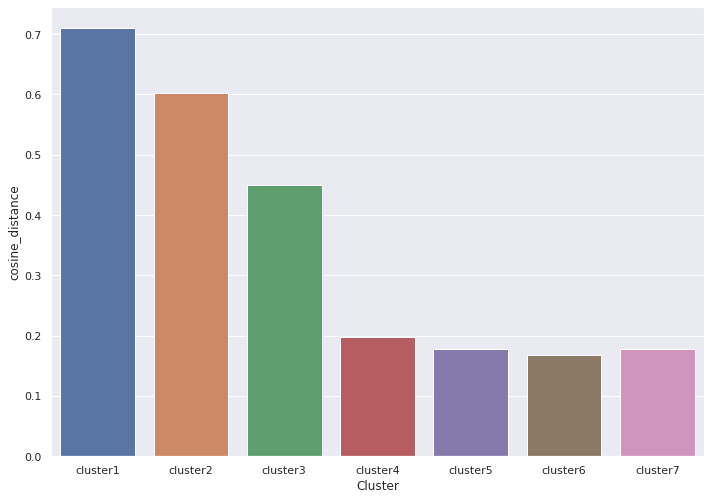

In [171]:
sns.barplot(x="Cluster", y="cosine_distance", data=us_nttdata_df)

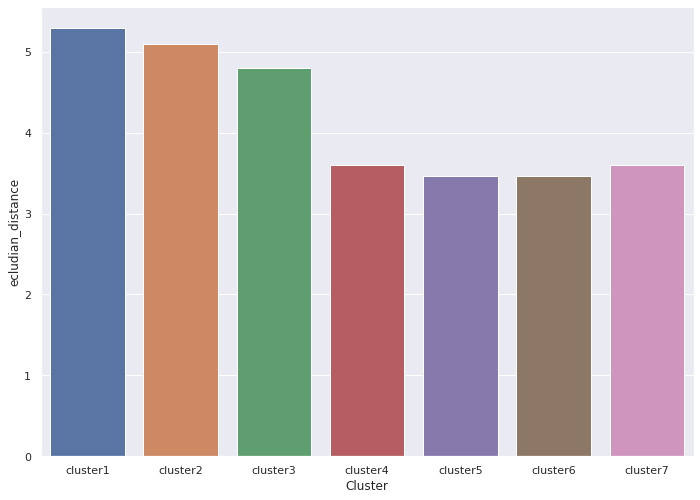

In [177]:
sns.barplot(x="Cluster", y="ecludian_distance", data=us_nttdata_df)

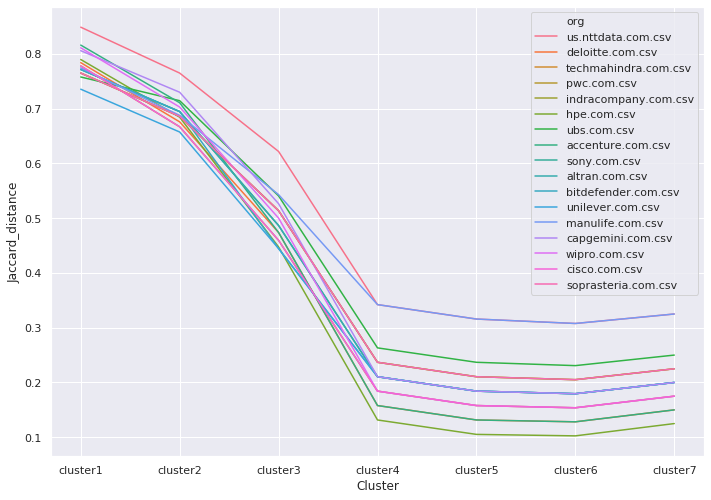

In [104]:
#ax = sns.scatterplot(x="spend_category", y="cosine_distance", data=us_nttdata_df,sizes=(15, 200))
ay = sns.lineplot(x="Cluster", y="Jaccard_distance", data=df,hue="org")

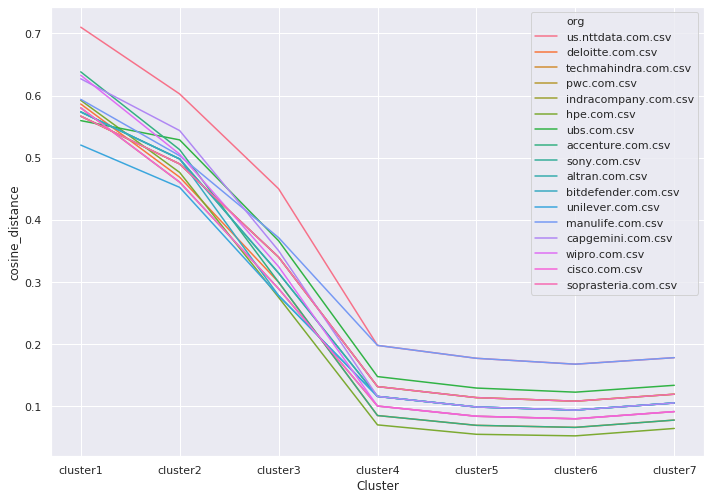

In [105]:
ay = sns.lineplot(x="Cluster", y="cosine_distance", data=df,hue="org")

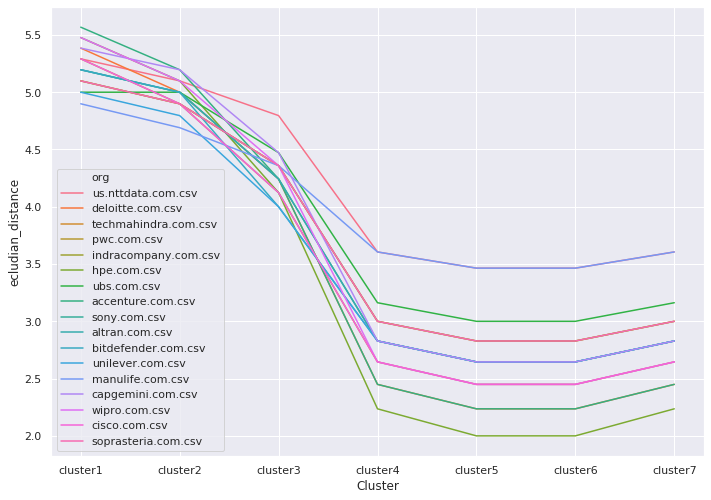

In [106]:
ay = sns.lineplot(x="Cluster", y="ecludian_distance", data=df,hue="org")

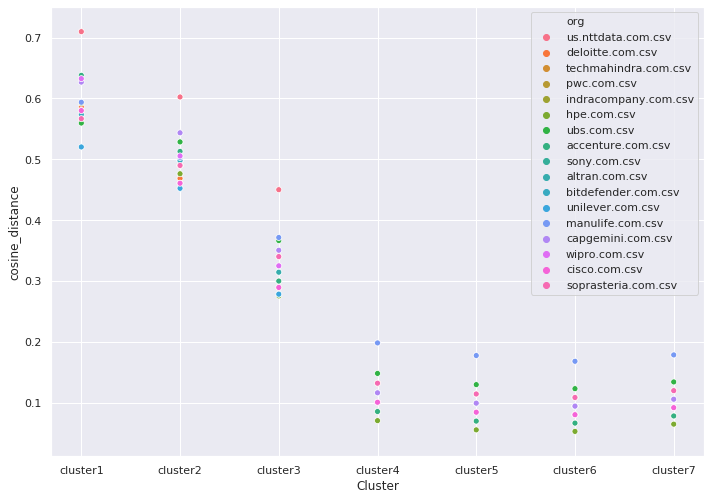

In [107]:
#sns.lineplot(x="spend_category", y="Jaccard_distance", data=us_nttdata_df )
ay = sns.scatterplot(x="Cluster", y="cosine_distance", data=df,hue= 'org')
#ay = sns.lineplot(x="Cluster", y="ecludian_distance", data=us_nttdata_df)
# ay = sns.scatterplot(x="Cluster", y="Hamming_distance", data=us_nttdata_df)
# ay = sns.scatterplot(x="Cluster", y="Jaccard_distance", data=us_nttdata_df)
# ay = sns.scatterplot(x="Cluster", y="kulsinski_distance", data=us_nttdata_df)


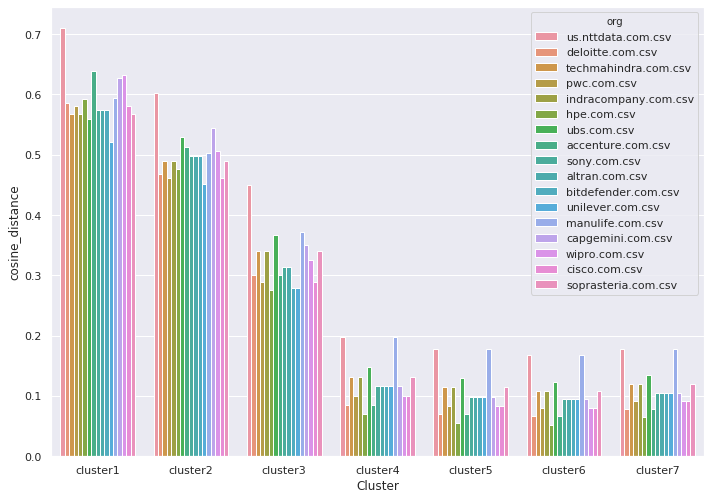

In [108]:
sns.barplot(x="Cluster", y="cosine_distance", data=df,hue= 'org')

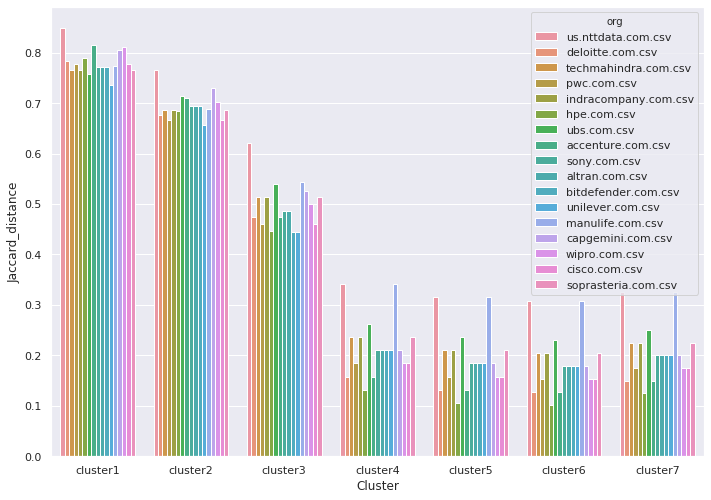

In [109]:
sns.barplot(x="Cluster", y="Jaccard_distance", data=df,hue= 'org')

In [186]:
a_list = ["a", "b", "a"]
a_list.count("z")

0

In [222]:
6**3

216